In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model, \
preprocessing, model_selection, pipeline, metrics

import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.max_columns = 1000

from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [12]:
df = pd.read_csv("/data/stocks.csv").query("symbol == 'AAPL'")

In [13]:
df.head()

,date,open,high,low,close,volume,adjclose,symbol
41,2000-07-17,58.249998,58.812501,57.124999,58.312503,65000600.0,3.813327,AAPL
442,2000-07-18,58.499997,58.874999,56.875000,57.250002,79601200.0,3.743845,AAPL
844,2000-07-19,55.187501,56.812502,51.750000,52.687501,114468200.0,3.445482,AAPL
1246,2000-07-20,55.000000,57.062501,54.125000,55.125000,116393200.0,3.604881,AAPL
1648,2000-07-21,54.359302,55.625001,52.937500,53.562501,49058800.0,3.502702,AAPL


In [14]:
df = df[["date", "adjclose"]]

In [15]:
df["date"] = pd.to_datetime(df.date)

In [16]:
df.set_index("date")

,adjclose
date,
2000-07-17,3.813327
2000-07-18,3.743845
2000-07-19,3.445482
2000-07-20,3.604881
2000-07-21,3.502702
2000-07-24,3.183903
2000-07-25,3.273821
2000-07-26,3.273821
2000-07-27,3.400523


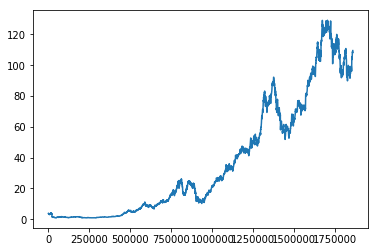

In [22]:
df.adjclose.plot()

In [32]:
df["d0"] = df.adjclose.shift(0)
df["d1"] = df.adjclose.shift(1)
df["d2"] = df.adjclose.shift(2)
df["d3"] = df.adjclose.shift(3)
df["d4"] = df.adjclose.shift(4)
df["d5"] = df.adjclose.shift(5)
df["d6"] = df.adjclose.shift(6)
df.head(10)



,date,adjclose,d1,d2,d3,d4,d5,d6,d0
41,2000-07-17,3.813327,NaN,NaN,NaN,NaN,NaN,NaN,3.813327
442,2000-07-18,3.743845,3.813327,NaN,NaN,NaN,NaN,NaN,3.743845
844,2000-07-19,3.445482,3.743845,3.813327,NaN,NaN,NaN,NaN,3.445482
1246,2000-07-20,3.604881,3.445482,3.743845,3.813327,NaN,NaN,NaN,3.604881
1648,2000-07-21,3.502702,3.604881,3.445482,3.743845,3.813327,NaN,NaN,3.502702
2050,2000-07-24,3.183903,3.502702,3.604881,3.445482,3.743845,3.813327,NaN,3.183903
2452,2000-07-25,3.273821,3.183903,3.502702,3.604881,3.445482,3.743845,3.813327,3.273821
2854,2000-07-26,3.273821,3.273821,3.183903,3.502702,3.604881,3.445482,3.743845,3.273821
3256,2000-07-27,3.400523,3.273821,3.273821,3.183903,3.502702,3.604881,3.445482,3.400523
3658,2000-07-28,3.159380,3.400523,3.273821,3.273821,3.183903,3.502702,3.604881,3.159380


In [33]:
(3.604881 - 3.445482) / 3.445482

0.046263193364527694

In [35]:
df["d0"] = (df.adjclose.shift(0) -  df.adjclose.shift(1)) / df.adjclose.shift(1)
df["d1"] = (df.adjclose.shift(1) -  df.adjclose.shift(2)) / df.adjclose.shift(2)
df["d2"] = (df.adjclose.shift(2) -  df.adjclose.shift(3)) / df.adjclose.shift(3)
df["d3"] = (df.adjclose.shift(3) -  df.adjclose.shift(4)) / df.adjclose.shift(4)
df["d4"] = (df.adjclose.shift(4) -  df.adjclose.shift(5)) / df.adjclose.shift(5)
df["d5"] = (df.adjclose.shift(5) -  df.adjclose.shift(6)) / df.adjclose.shift(6)
df["d6"] = (df.adjclose.shift(6) -  df.adjclose.shift(7)) / df.adjclose.shift(7)
df["y"] = np.where(df["d0"] > 0.01, 1, 0)
df.head(10)

,date,adjclose,d1,d2,d3,d4,d5,d6,d0,y
41,2000-07-17,3.813327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
442,2000-07-18,3.743845,NaN,NaN,NaN,NaN,NaN,NaN,-0.018221,0
844,2000-07-19,3.445482,-0.018221,NaN,NaN,NaN,NaN,NaN,-0.079694,0
1246,2000-07-20,3.604881,-0.079694,-0.018221,NaN,NaN,NaN,NaN,0.046263,1
1648,2000-07-21,3.502702,0.046263,-0.079694,-0.018221,NaN,NaN,NaN,-0.028345,0
2050,2000-07-24,3.183903,-0.028345,0.046263,-0.079694,-0.018221,NaN,NaN,-0.091015,0
2452,2000-07-25,3.273821,-0.091015,-0.028345,0.046263,-0.079694,-0.018221,NaN,0.028241,1
2854,2000-07-26,3.273821,0.028241,-0.091015,-0.028345,0.046263,-0.079694,-0.018221,0.000000,0
3256,2000-07-27,3.400523,0.000000,0.028241,-0.091015,-0.028345,0.046263,-0.079694,0.038702,1
3658,2000-07-28,3.159380,0.038702,0.000000,0.028241,-0.091015,-0.028345,0.046263,-0.070914,0


In [37]:
df.dropna(inplace=True)

In [38]:
df.head(10)

,date,adjclose,d1,d2,d3,d4,d5,d6,d0,y
2854,2000-07-26,3.273821,0.028241,-0.091015,-0.028345,0.046263,-0.079694,-0.018221,0.000000,0
3256,2000-07-27,3.400523,0.000000,0.028241,-0.091015,-0.028345,0.046263,-0.079694,0.038702,1
3658,2000-07-28,3.159380,0.038702,0.000000,0.028241,-0.091015,-0.028345,0.046263,-0.070914,0
4061,2000-07-31,3.322867,-0.070914,0.038702,0.000000,0.028241,-0.091015,-0.028345,0.051747,1
4464,2000-08-01,3.224775,0.051747,-0.070914,0.038702,0.000000,0.028241,-0.091015,-0.029520,0
4867,2000-08-02,3.089898,-0.029520,0.051747,-0.070914,0.038702,0.000000,0.028241,-0.041825,0
5270,2000-08-03,3.138944,-0.041825,-0.029520,0.051747,-0.070914,0.038702,0.000000,0.015873,1
5673,2000-08-04,3.098072,0.015873,-0.041825,-0.029520,0.051747,-0.070914,0.038702,-0.013021,0
6076,2000-08-07,3.134857,-0.013021,0.015873,-0.041825,-0.029520,0.051747,-0.070914,0.011874,1
6479,2000-08-08,3.057201,0.011874,-0.013021,0.015873,-0.041825,-0.029520,0.051747,-0.024772,0


In [41]:
df.y.value_counts()/len(df)

0    0.686556
1    0.313444
Name: y, dtype: float64

In [47]:
df.tail()

,date,adjclose,d1,d2,d3,d4,d5,d6,d0,y
1854640,2016-08-09,108.809998,0.008281,0.015207,0.006178,0.012538,-0.014804,0.017657,0.004060,0
1855141,2016-08-10,108.000000,0.004060,0.008281,0.015207,0.006178,0.012538,-0.014804,-0.007444,0
1855642,2016-08-11,107.930000,-0.007444,0.004060,0.008281,0.015207,0.006178,0.012538,-0.000648,0
1856143,2016-08-12,108.180000,-0.000648,-0.007444,0.004060,0.008281,0.015207,0.006178,0.002316,0
1856644,2016-08-15,109.480003,0.002316,-0.000648,-0.007444,0.004060,0.008281,0.015207,0.012017,1


In [48]:
len(df)

4039

In [49]:
df_train = df.iloc[1000:-100, :]
df_test = df.iloc[-100:, :]

In [50]:
X_train = df_train.iloc[:, 2:-2]
X_test = df_test.iloc[:, 2:-2]
y_train = df_train.y
y_test = df_test.y

Accuracy: train: 0.694114, test: 0.770000


(<matplotlib.figure.Figure at 0x10ea2b400>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a14496a20>)

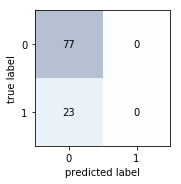

In [51]:
pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))